# Mplstyle and DRY for storytelling in matplotlib

In [1]:
import matplotlib.pyplot as plt 
import duckdb
import pandas as pd 

plt.style.use("styles/base.mplstyle")
df = pd.read_csv("data/jobs_in_data.csv")
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [2]:
df.shape

(9355, 12)

In [3]:
df_job_categories = df["job_category"].value_counts()
df_job_categories

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64

In [4]:
type(df_job_categories)

pandas.core.series.Series

# visualizations

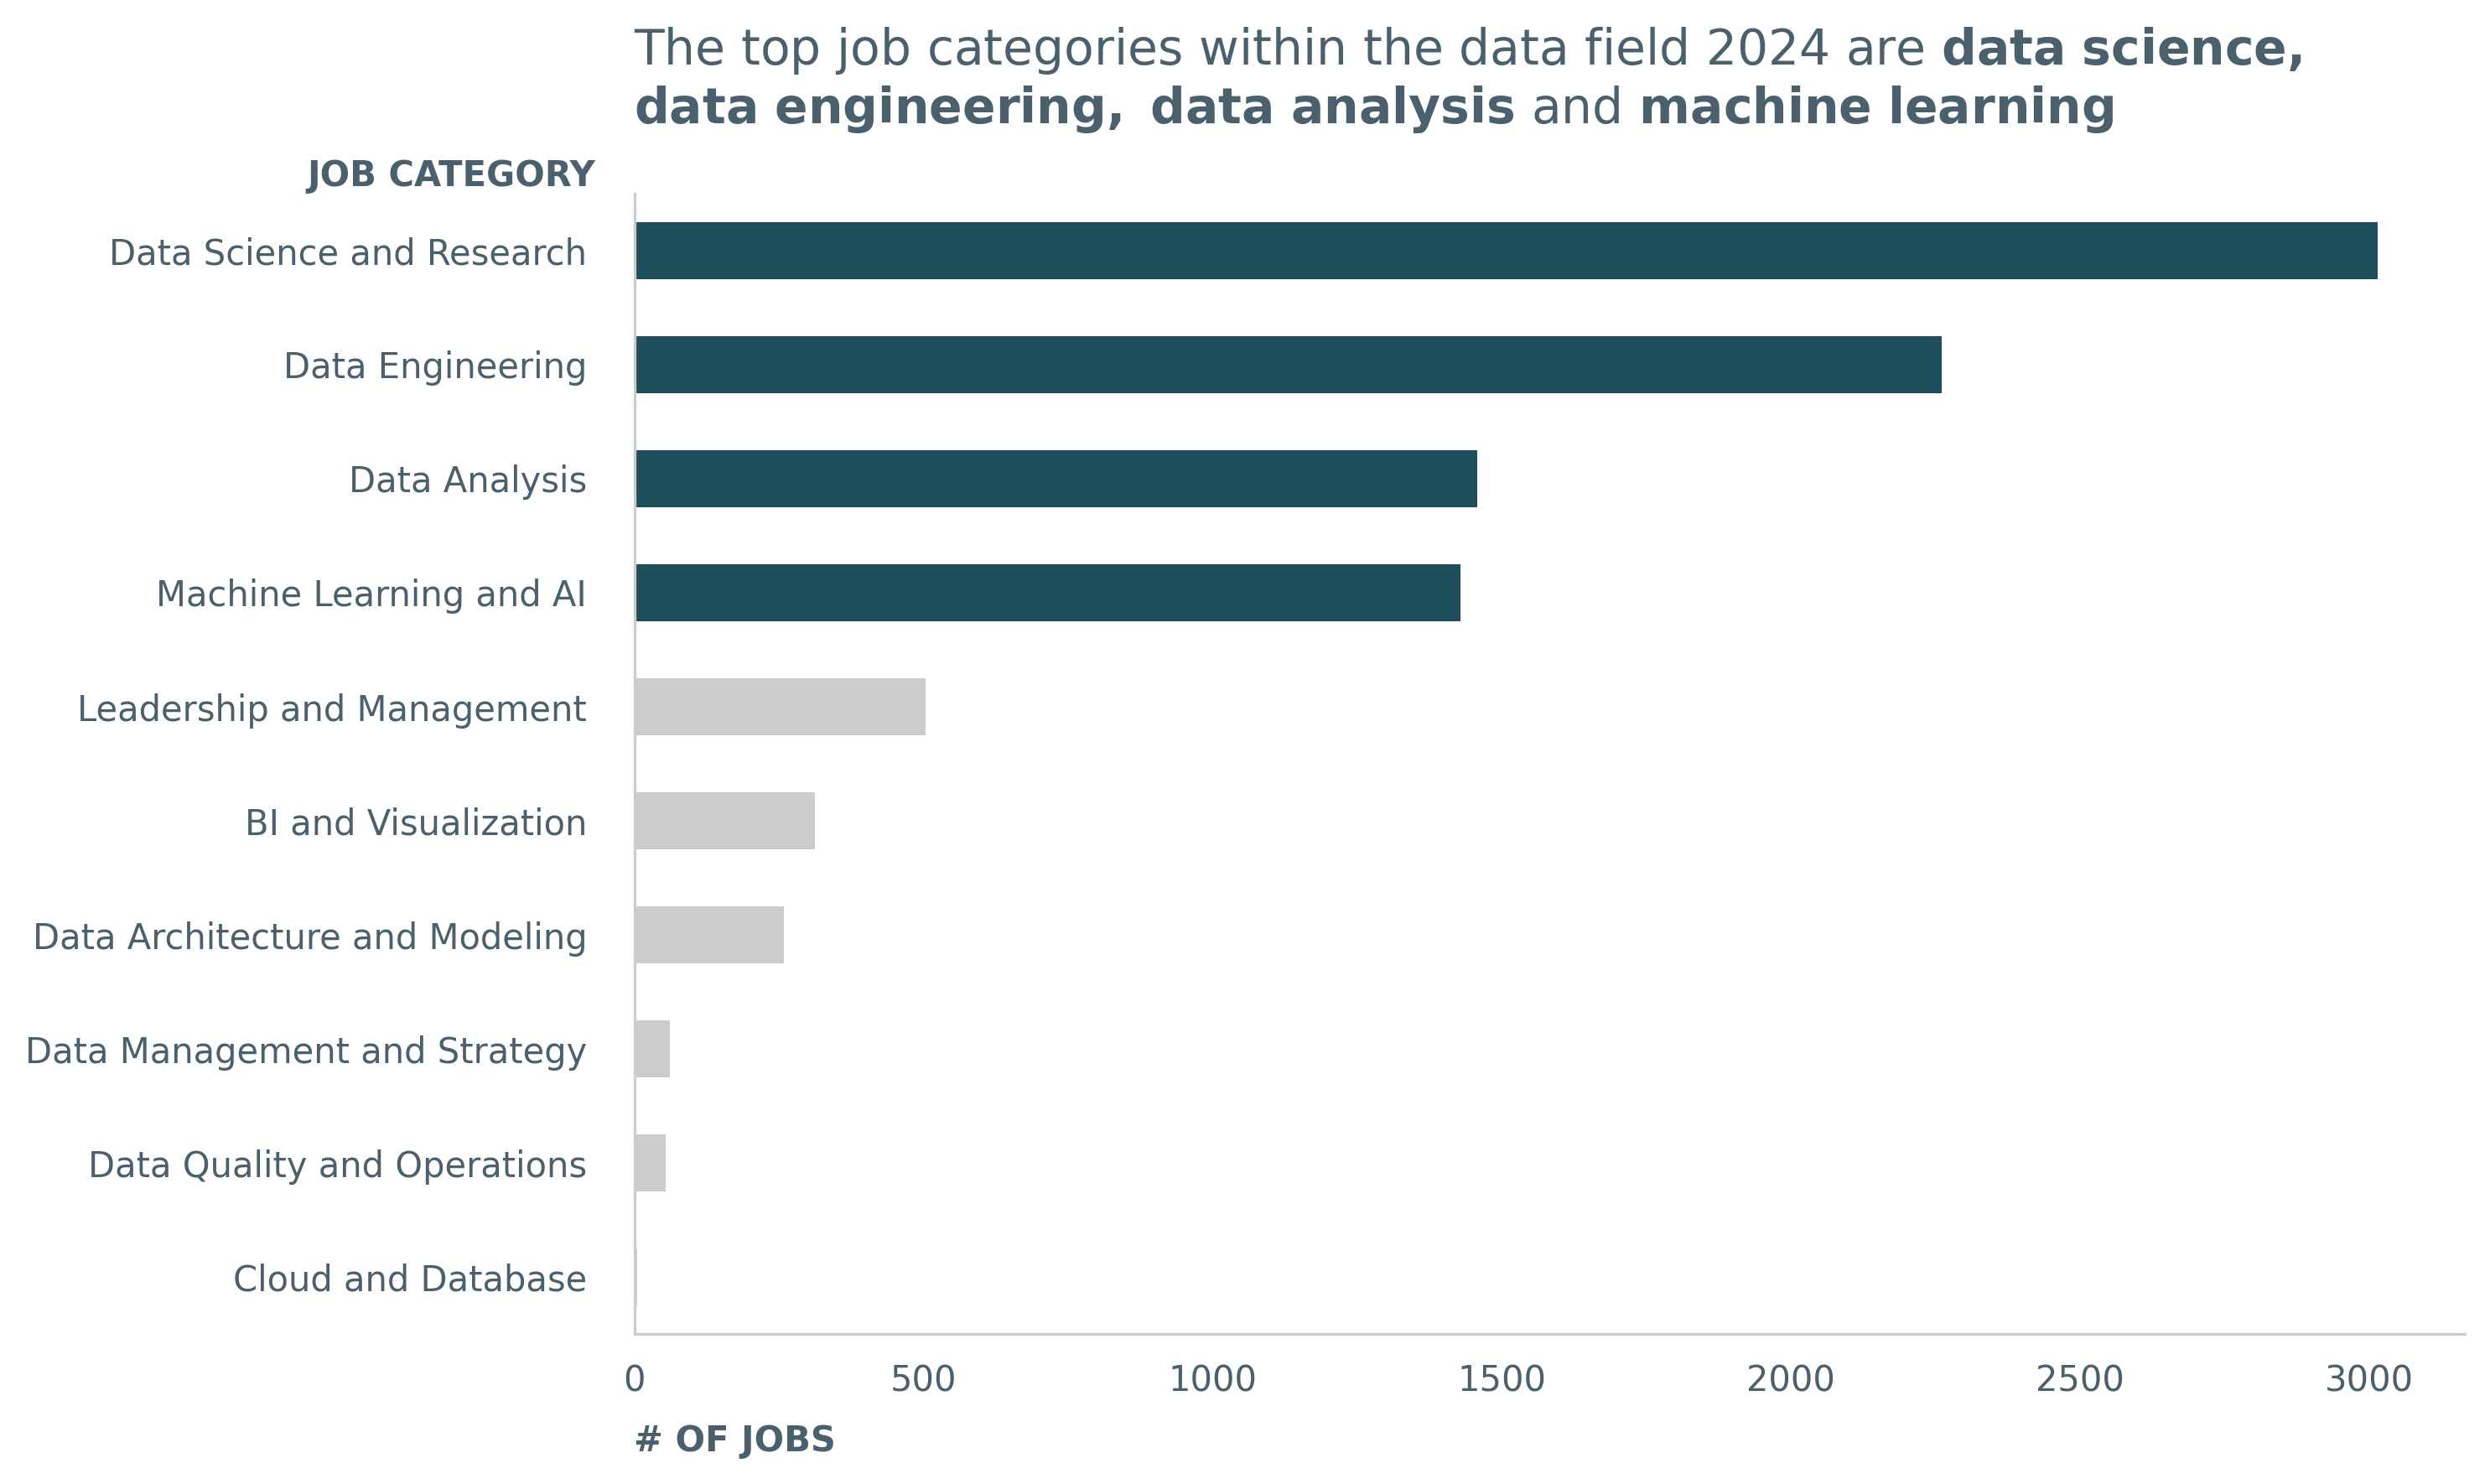

In [5]:
from charts_utils import horizontal_bar_options, save_fig_from_ax
from constants import BLUE_1, GRAY_1

colors = [GRAY_1] * len(df_job_categories)
colors[:4] = [BLUE_1] * 4

ax = df_job_categories.plot(kind="barh", color=colors)

ax = horizontal_bar_options(
    ax,
    title="The top job categories within the data field 2024 are "
    + r"$\bf{data\ science},$"
    + "\n"
    + r"$\bf{data\ engineering},$"
    + r"$\bf{\ data\ analysis\ \text{and}\ machine\ learning}$",
    xlabel="# OF JOBS",
    ylabel="JOB CATEGORY",
)


save_fig_from_ax(ax, "figures/number_data_jobs.png")

In [6]:
df_salary = (duckdb.query("""SELECT job_category, CAST(AVG(salary_in_usd) AS INT) AS avg_salary_usd FROM df GROUP BY job_category ORDER BY avg_salary_usd DESC""").df().set_index("job_category"))
df_salary

,avg_salary_usd
job_category,
Machine Learning and AI,178926
Data Science and Research,163759
Data Architecture and Modeling,156002
Cloud and Database,155000
Data Engineering,146198
Leadership and Management,145476
BI and Visualization,135092
Data Analysis,108506
Data Management and Strategy,103140


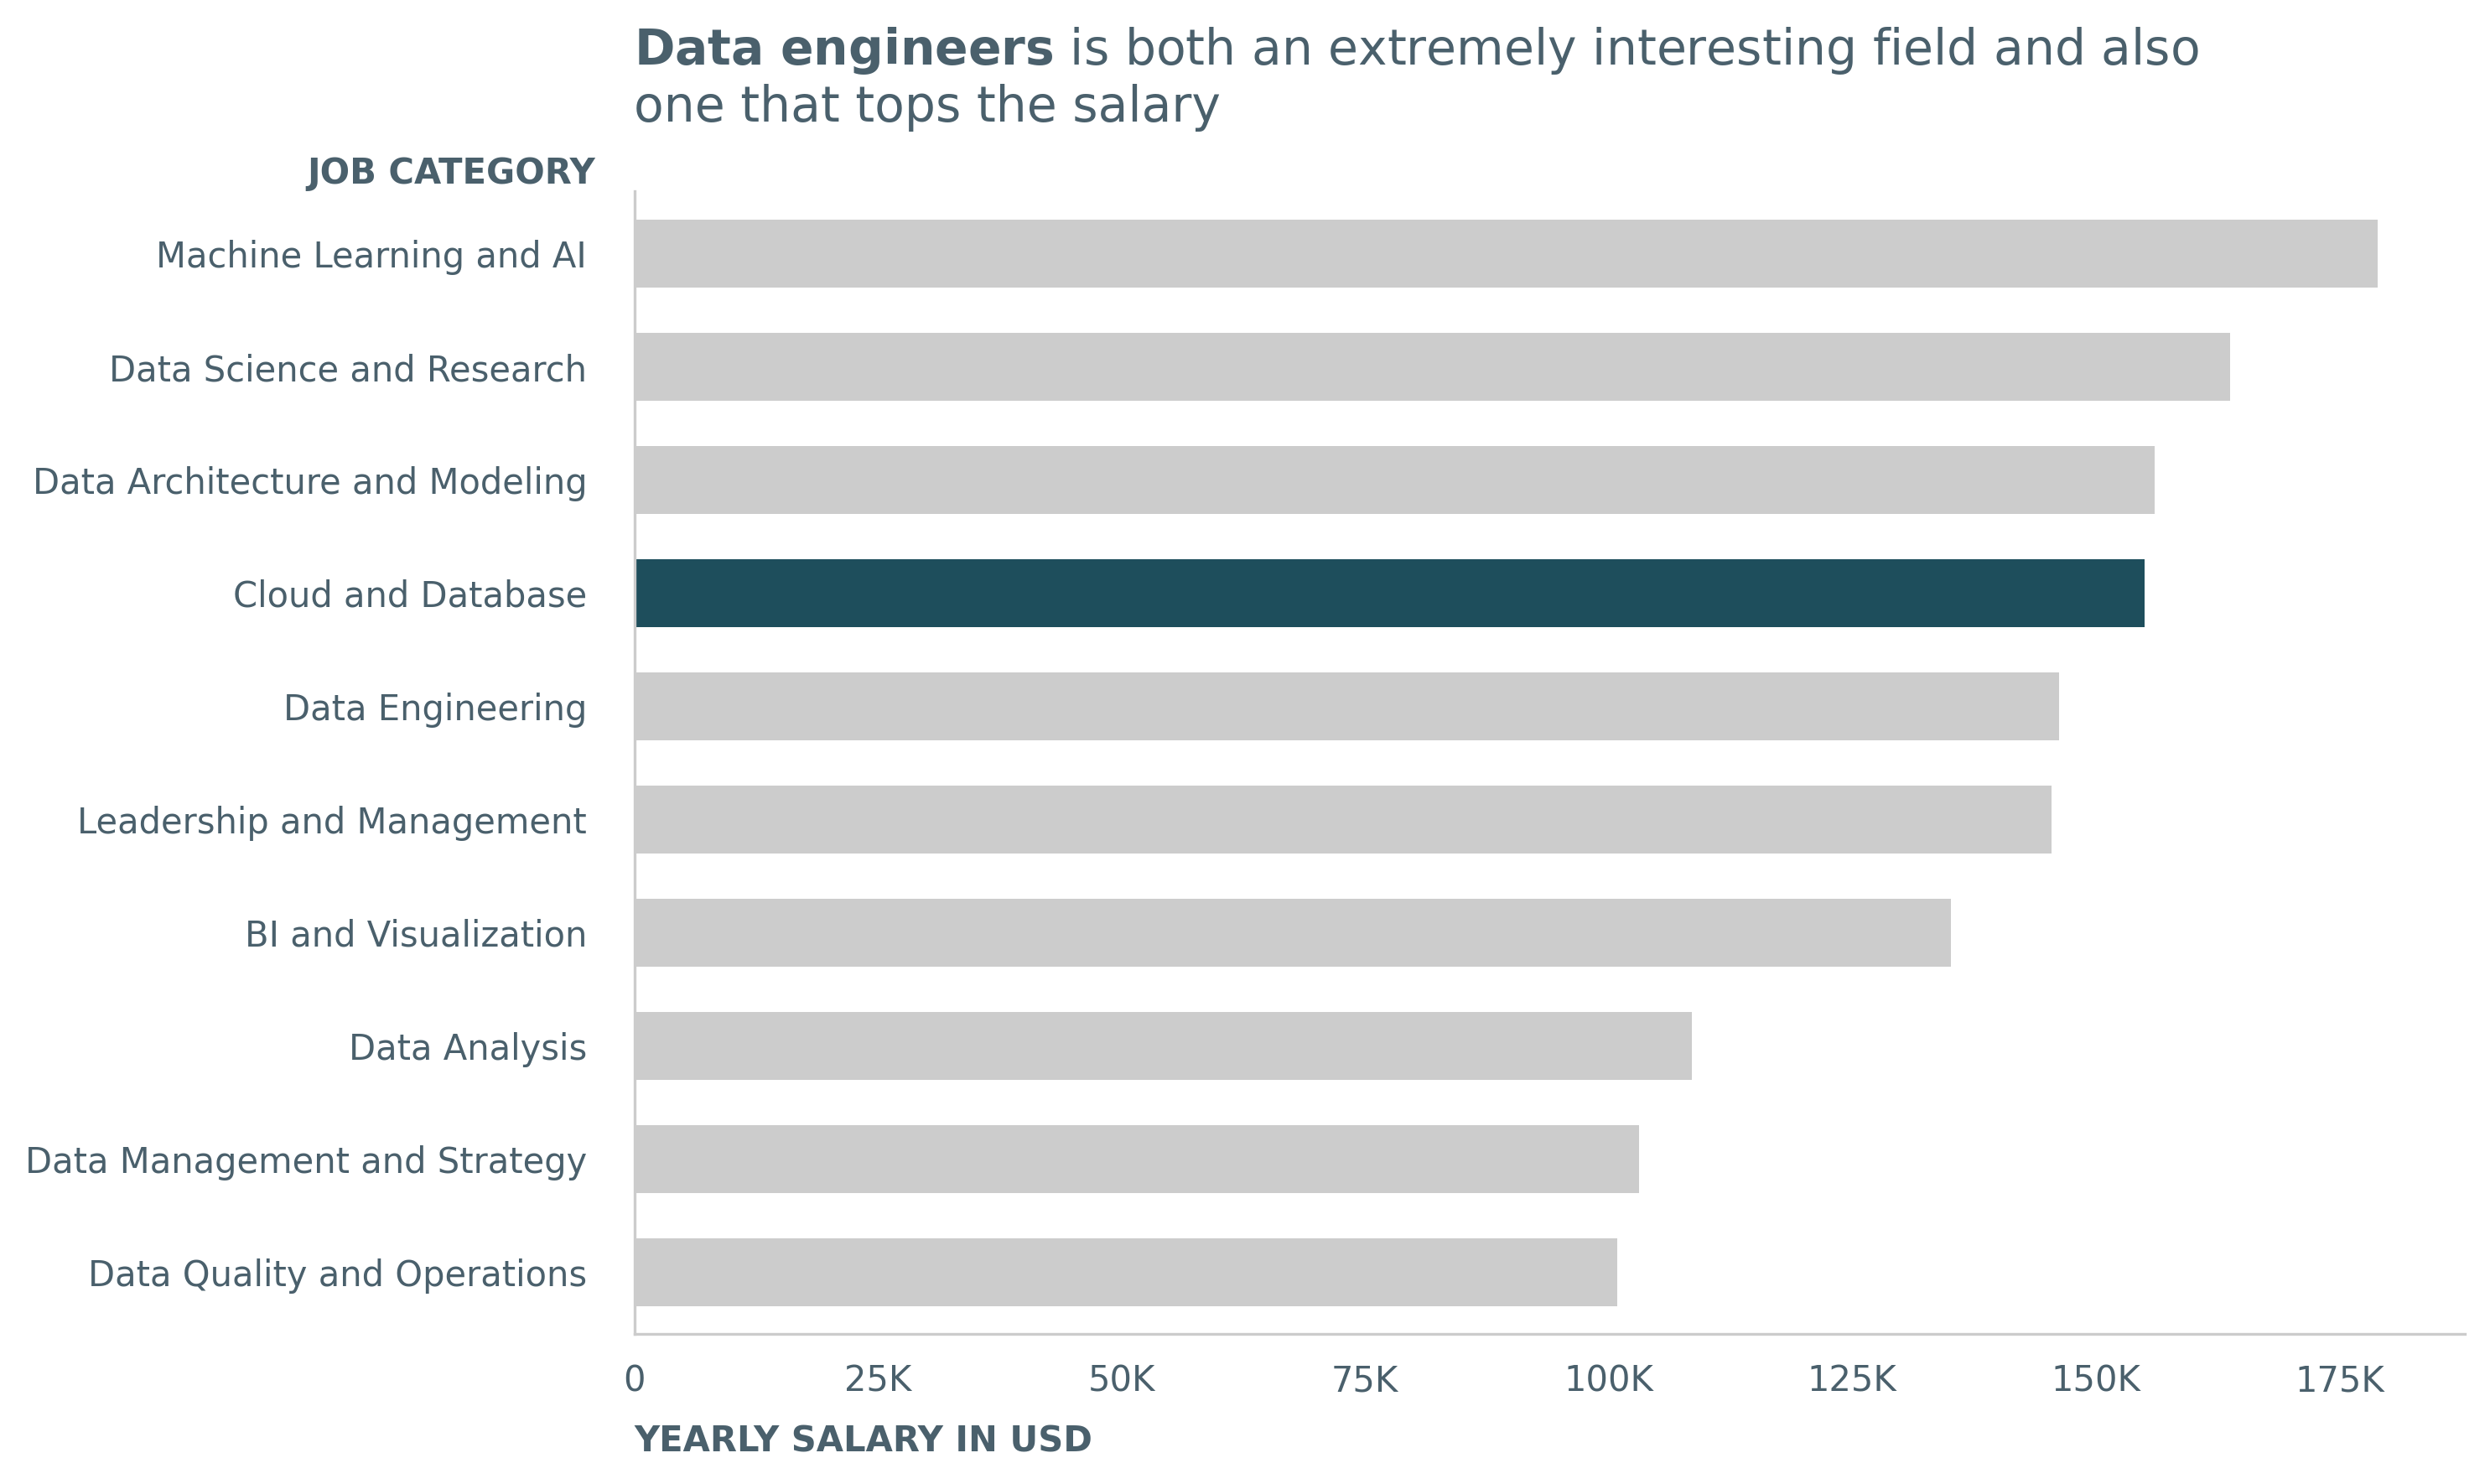

In [7]:
from charts_utils import thousands_formatter

colors = [GRAY_1] * len(df_salary)
colors[3] = BLUE_1

# important to use a pd.Series for colors to work
ax = df_salary["avg_salary_usd"].plot(kind="barh", color=colors, width=0.6)

ax = horizontal_bar_options(
    ax,
    xlabel="YEARLY SALARY IN USD",
    ylabel="JOB CATEGORY",
    title=r"$\bf{Data\ engineers}$"
    + " is both an extremely interesting field and also \none that tops the salary",
)

ax = thousands_formatter(ax, axis="x")

save_fig_from_ax(ax, "figures/data_jobs_salaries.png")